#Loading the Data

In [3]:
import pandas as pd

# Load the datasets
iris = pd.read_csv('iris.csv', header=None)  # No header in the file
kmtest = pd.read_csv('kmtest.csv', header=None)

# Correct column names for the Iris dataset
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Convert KMTest dataset from one-column strings to separate numeric columns
kmtest = kmtest[0].str.split(expand=True).astype(float)
kmtest.columns = ['feature1', 'feature2']

# Display the corrected datasets
print("Corrected Iris Dataset:")
print(iris.head())

print("\nCorrected KMTest Dataset:")
print(kmtest.head())


Corrected Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width   species
0           5.1          3.5           1.4          0.2  'setosa'
1           4.9          3.0           1.4          0.2  'setosa'
2           4.7          3.2           1.3          0.2  'setosa'
3           4.6          3.1           1.5          0.2  'setosa'
4           5.0          3.6           1.4          0.2  'setosa'

Corrected KMTest Dataset:
   feature1  feature2
0       2.0       4.0
1       3.0       3.0
2       3.0       4.0
3       3.0       5.0
4       4.0       3.0


#Data Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
iris_features = iris.drop(columns=['species'])
kmtest_features = kmtest

# Normalize the data
scaler = StandardScaler()
iris_normalized = scaler.fit_transform(iris_features)
kmtest_normalized = scaler.fit_transform(kmtest_features)

print("\nIris Data Normalized:")
print(iris_normalized[:5])

print("\nKMTest Data Normalized:")
print(kmtest_normalized[:5])



Iris Data Normalized:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

KMTest Data Normalized:
[[-1.58837254 -0.74136248]
 [-1.37591507 -1.17382392]
 [-1.37591507 -0.74136248]
 [-1.37591507 -0.30890103]
 [-1.16345759 -1.17382392]]


 # Implement K-Means Clustering

In [22]:
from sklearn.cluster import KMeans

# Function to apply KMeans and print results
def apply_kmeans(data, n_clusters, dataset_name):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(data)

    # Print cluster centers and labels
    print(f"\nKMeans Clustering on {dataset_name} Dataset:")
    print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
    print(f"Labels:\n{kmeans.labels_}")

    return kmeans.labels_

# Apply KMeans to both datasets (normalized)
iris_labels = apply_kmeans(iris_normalized, n_clusters=3, dataset_name='Iris')
kmtest_labels = apply_kmeans(kmtest_normalized, n_clusters=2, dataset_name='KMTest')



KMeans Clustering on Iris Dataset:
Cluster Centers:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

KMeans Clustering on KMTest Dataset:
Cluster Centers:
[[-0.80227989 -0.65487019]
 [ 0.72934535  0.59533653]]
Labels:
[0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1]


# Analyze the Effect of Normalization

In [23]:
# Apply KMeans without normalization
iris_labels_non_normalized = apply_kmeans(iris_features.values, n_clusters=3, dataset_name='Iris Non-Normalized')
kmtest_labels_non_normalized = apply_kmeans(kmtest_features.values, n_clusters=2, dataset_name='KMTest Non-Normalized')

# Function to compare clustering results
def compare_clusters(labels1, labels2, dataset_name):
    comparison = labels1 == labels2
    similarity = sum(comparison) / len(labels1)
    print(f"\nSimilarity between normalized and non-normalized clusters for {dataset_name} Dataset: {similarity:.2f}")

compare_clusters(iris_labels, iris_labels_non_normalized, 'Iris')
compare_clusters(kmtest_labels, kmtest_labels_non_normalized, 'KMTest')



KMeans Clustering on Iris Non-Normalized Dataset:
Cluster Centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

KMeans Clustering on KMTest Non-Normalized Dataset:
Cluster Centers:
[[12.          6.4       ]
 [ 3.16666667  4.        ]]
Labels:
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Similarity between normalized and non-normalized clusters for Iris Dataset: 0.93

Similarity between normalized and non-normalized clusters for KMTest Dataset: 0.19


# Visualize the Results

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to plot clusters
def plot_clusters(data, labels, title):
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()



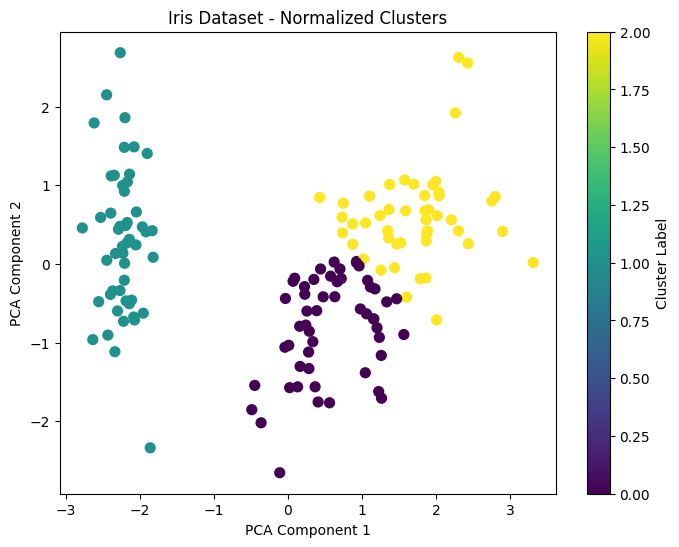

In [25]:
# Plot normalized clusters
plot_clusters(iris_normalized, iris_labels, "Iris Dataset - Normalized Clusters")



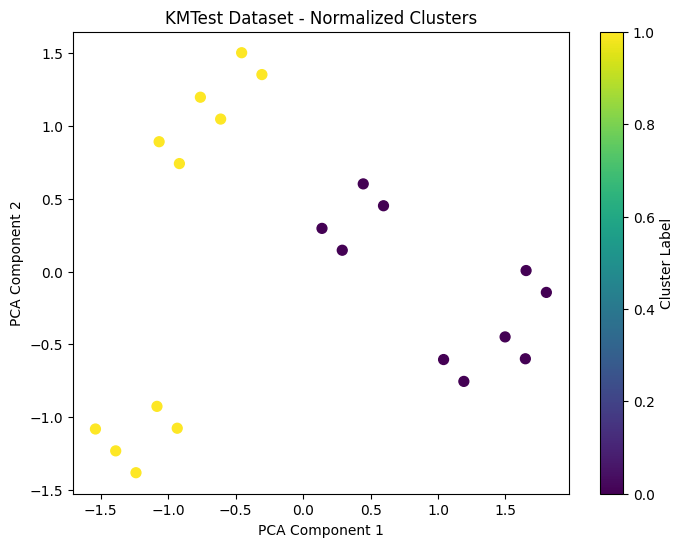

In [26]:
plot_clusters(kmtest_normalized, kmtest_labels, "KMTest Dataset - Normalized Clusters")


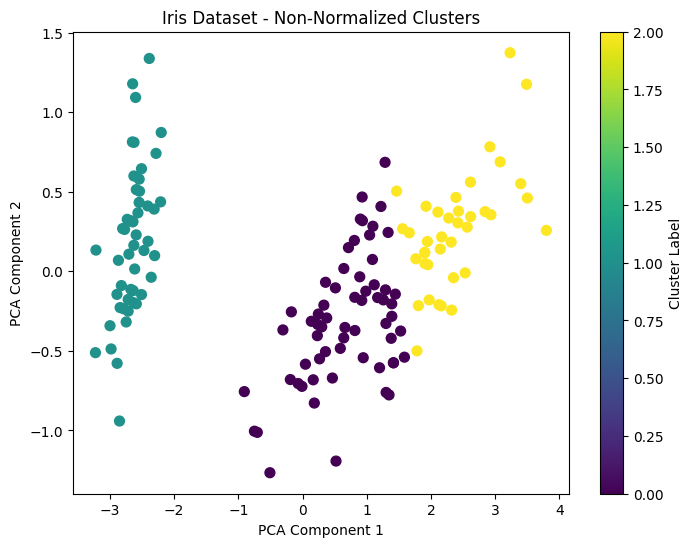

In [27]:
# Plot non-normalized clusters
plot_clusters(iris_features.values, iris_labels_non_normalized, "Iris Dataset - Non-Normalized Clusters")


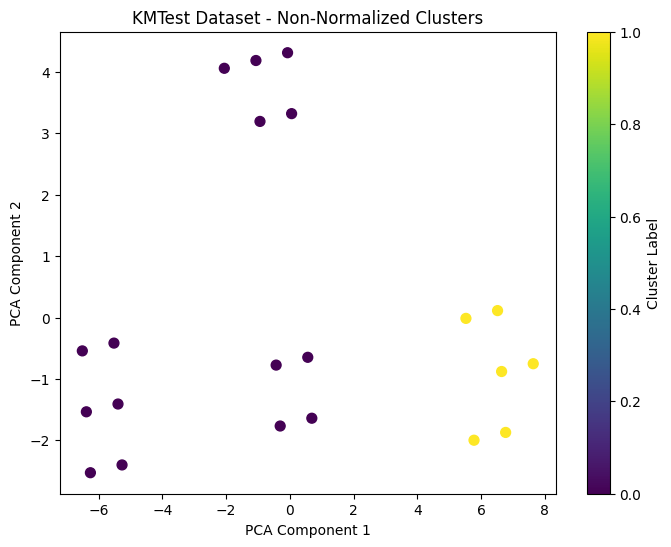

In [28]:
plot_clusters(kmtest_features.values, kmtest_labels_non_normalized, "KMTest Dataset - Non-Normalized Clusters")
